## Import TensorFlow and required libraries!!!

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
# Import other lib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

## Load the Dataset

In [ ]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# the data is only 2D:
# convolution expects (height x width x color)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


## Create the model with functional API

In [ ]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

## Train the Model

In [ ]:
# Compile and fit
# Note: make sure using the GPU for this

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 20s 6ms/step - loss: 0.5159 - accuracy: 0.8087 - val_loss: 0.3995 - val_accuracy: 0.8504
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3592 - accuracy: 0.8657 - val_loss: 0.3384 - val_accuracy: 0.8719
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3073 - accuracy: 0.8845 - val_loss: 0.3329 - val_accuracy: 0.8709
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2751 - accuracy: 0.8958 - val_loss: 0.3046 - val_accuracy: 0.8871
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2515 - accuracy: 0.9052 - val_loss: 0.2969 - val_accuracy: 0.8928
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2298 - accuracy: 0.9129 - val_loss: 0.2937 - val_accuracy: 0.8931
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2109 - accuracy: 0.9207 - val_loss: 0.3021 - val_ac

## Evaluate the model

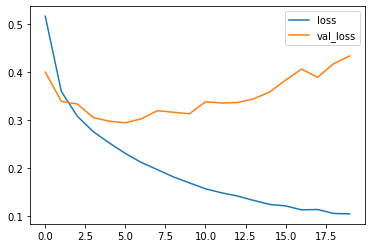

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

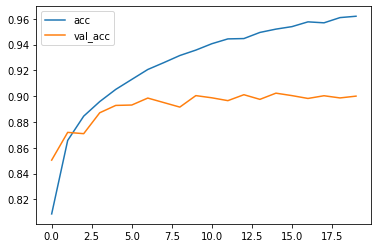

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Confusion matrix func
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()


Confusion matrix, without normalization
[[884   0  18  18   2   2  73   0   3   0]
 [  2 971   2  17   2   0   4   0   2   0]
 [ 23   0 892   9  21   0  51   0   4   0]
 [ 23   2  14 897  36   0  23   0   3   2]
 [  1   0 123  29 770   0  75   0   2   0]
 [  1   0   0   1   0 979   0  14   0   5]
 [104   0  72  25  70   0 720   0   9   0]
 [  0   0   0   0   0  16   0 954   0  30]
 [  3   1   4   3   4   2   8   0 973   2]
 [  0   0   0   0   0   7   1  32   0 960]]


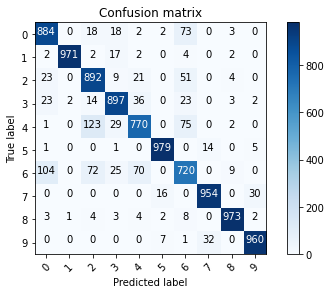

In [ ]:
# Plot confusion matrix
pred_test = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(10)))

## Prediction: True-classified Vs Misclassified examples

In [ ]:
# Label mapping
# Check each training and test assigined labels here: https://www.kaggle.com/zalando-research/fashionmnist
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boat'''.split("\n")

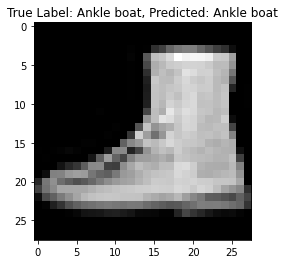

In [ ]:
# True-classified examples
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));

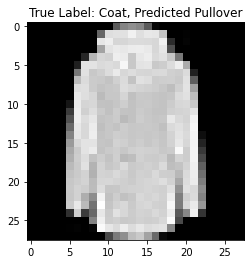

In [ ]:
# Misclassified examples
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True Label: %s, Predicted %s" % (labels[y_test[i]], labels[pred_test[i]]));